<a href="https://colab.research.google.com/github/SagnikChunder/Brainwave-Based-Cognitive-State-Classifier/blob/main/Brainwave_Based_Cognitive_State_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving S001R08.edf to S001R08.edf
Saving S001R04.edf to S001R04.edf
Saving S001R07.edf to S001R07.edf
Saving S001R03.edf to S001R03.edf


In [4]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 90.6 MB/s eta 0:00:00


READING EDF FILE

In [16]:
import os
import mne
import numpy as np

Define feature extraction function

In [17]:
def extract_bandpower(epoch_data, sfreq):
    psd, freqs = mne.time_frequency.psd_array_welch(epoch_data, sfreq=sfreq, fmin=1, fmax=50)
    bands = {'theta': (4, 7), 'alpha': (8, 13), 'beta': (14, 30)}
    features = []
    for band, (low, high) in bands.items():
        band_power = np.mean(psd[:, (freqs >= low) & (freqs <= high)], axis=1)
        features.extend(band_power)
    return features

Processing EDF files and assigning labels

In [18]:
X = []
y = []

edf_files = [f for f in os.listdir('/content') if f.endswith('.edf')]
print("EDF files found:", edf_files)

for file in edf_files:
    file_path = os.path.join('/content', file)
    print(f"Processing {file}...")

    # Load and preprocess
    raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
    raw.filter(1., 50., fir_design='firwin')

    # Epoching: 2-second fixed windows
    events = mne.make_fixed_length_events(raw, duration=2.0)
    epochs = mne.Epochs(raw, events, tmin=0.0, tmax=2.0, baseline=None, preload=True, verbose=False)

    sfreq = raw.info['sfreq']

    for epoch in epochs.get_data():
        features = extract_bandpower(epoch, sfreq)
        X.append(features)

        # Label assignment based on filename
        if any(x in file for x in ['R01', 'R02', 'R04']):
            y.append(0)  # Distraction
        elif any(x in file for x in ['R07', 'R08', 'R09', 'R10']):
            y.append(1)  # Attention
        else:
            y.append(-1)  # Unknown or ignore later

EDF files found: ['S001R07.edf', 'S001R03.edf', 'S001R04.edf', 'S001R08.edf']
Processing S001R07.edf...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)

Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)


CLEAN AND TRAIN UNKNOWN CLASSIFIER

REMOVE UNKNOWN LABELS(-1)

In [19]:
import numpy as np

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Filter out unknown labels
mask = y != -1
X_clean = X[mask]
y_clean = y[mask]

print(f"Cleaned dataset shape: {X_clean.shape}, Labels: {np.unique(y_clean, return_counts=True)}")

Cleaned dataset shape: (186, 192), Labels: (array([0, 1]), array([ 62, 124]))


Split Dataset & Train Classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.83      1.00      0.91        25

    accuracy                           0.87        38
   macro avg       0.92      0.81      0.84        38
weighted avg       0.89      0.87      0.86        38

Confusion Matrix:
 [[ 8  5]
 [ 0 25]]


Hyperparameter Tuning Using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

Define Parameter Grid

In [22]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

Run Grid Search

In [23]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,  # 3-fold cross-validation
                           scoring='accuracy',  # you can also try 'f1'
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score on Train (CV):", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score on Train (CV): 0.8512925170068026


Evaluate on test set

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.83      1.00      0.91        25

    accuracy                           0.87        38
   macro avg       0.92      0.81      0.84        38
weighted avg       0.89      0.87      0.86        38

Confusion Matrix:
 [[ 8  5]
 [ 0 25]]


VISUALIZE FEATURE IMPORTANCE

Get Feature Importance from the Trained Model

In [25]:
import matplotlib.pyplot as plt

# Get feature importances
importances = best_model.feature_importances_

# Assume 3 bands per channel (theta, alpha, beta)
n_channels = len(importances) // 3
band_labels = ['theta', 'alpha', 'beta']
feature_labels = [f"{band}_{i}" for i in range(n_channels) for band in band_labels]

# Sort for visualization
sorted_idx = np.argsort(importances)[::-1]
sorted_labels = [feature_labels[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

Plot

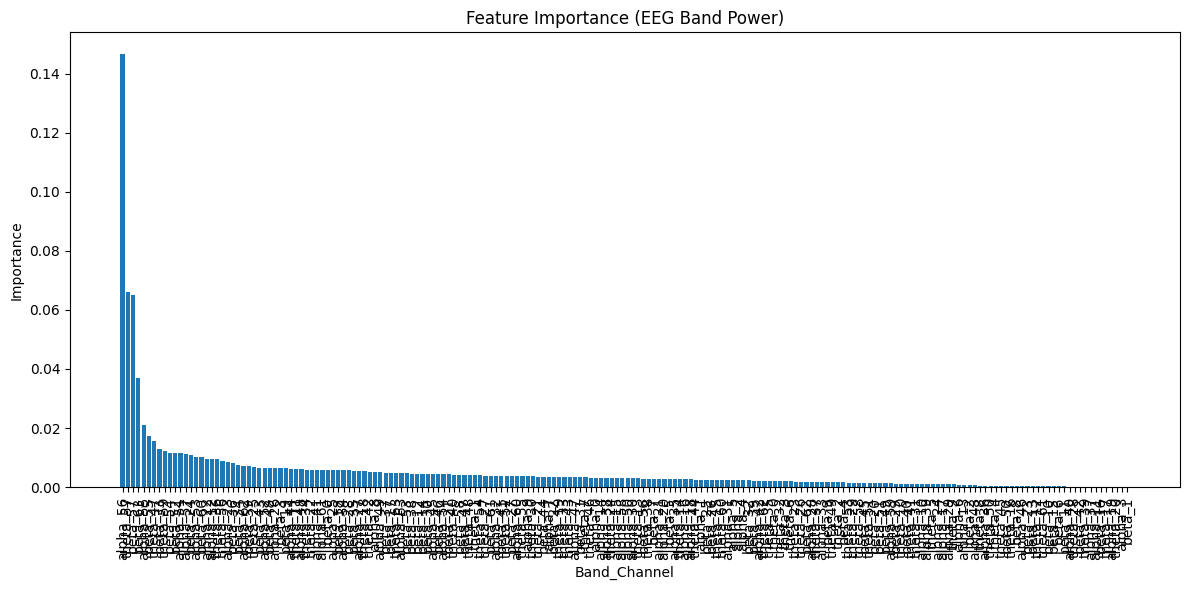

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_labels, rotation=90)
plt.title("Feature Importance (EEG Band Power)")
plt.xlabel("Band_Channel")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Visualize Raw EEG Pattern

Extracting EDF parameters from /content/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 62 events and 321 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


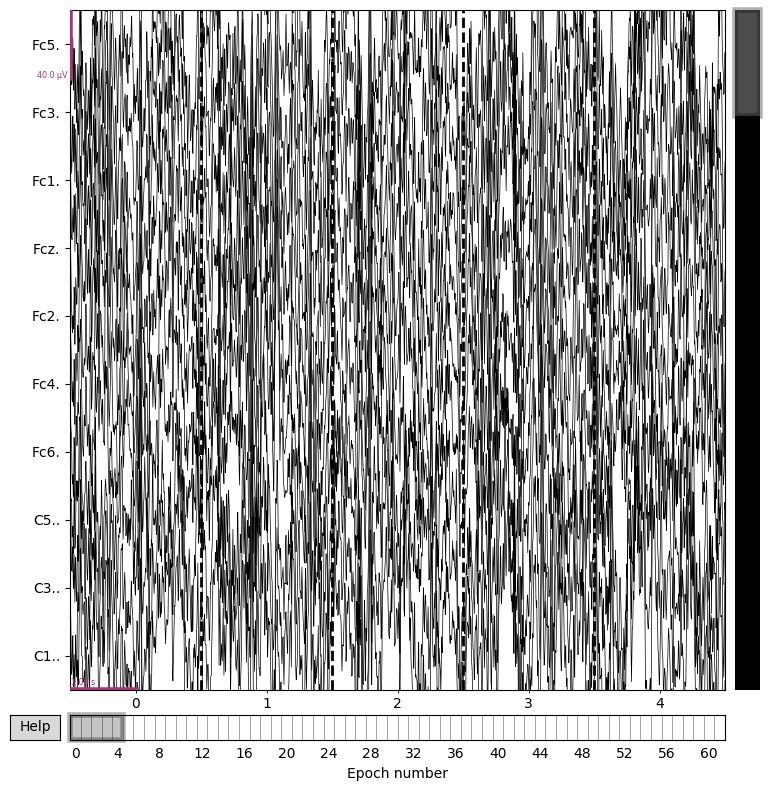

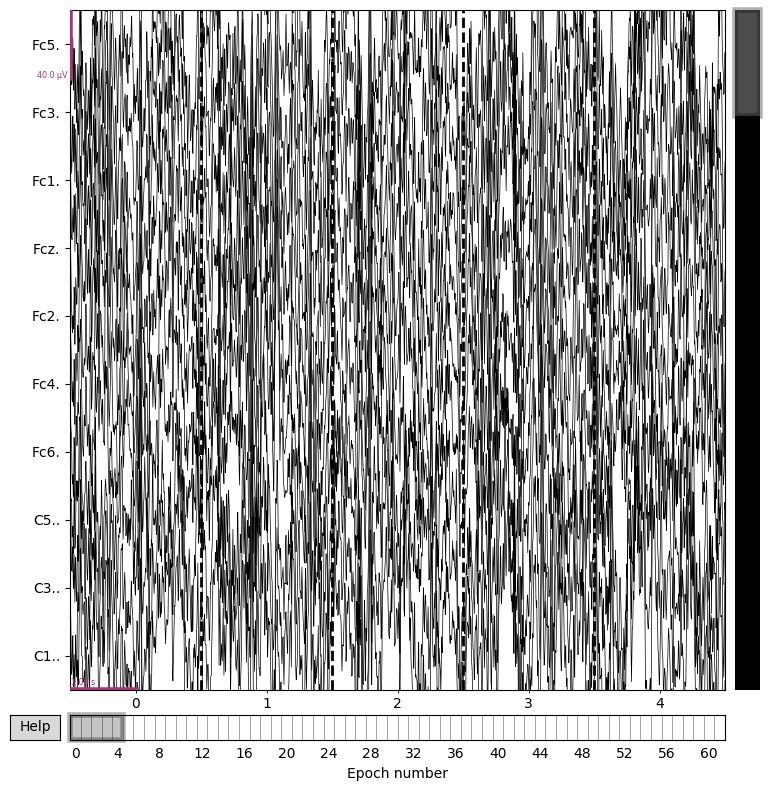

In [27]:
# Pick any EEG file for visual comparison
file_path = '/content/S001R03.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.filter(1., 50.)

# Create fixed length epochs
events = mne.make_fixed_length_events(raw, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=None, preload=True)

# Plot first 5 epochs
epochs.plot(n_epochs=5, n_channels=10, title="EEG Epochs")

Extracting EDF parameters from /content/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 62 events and 321 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


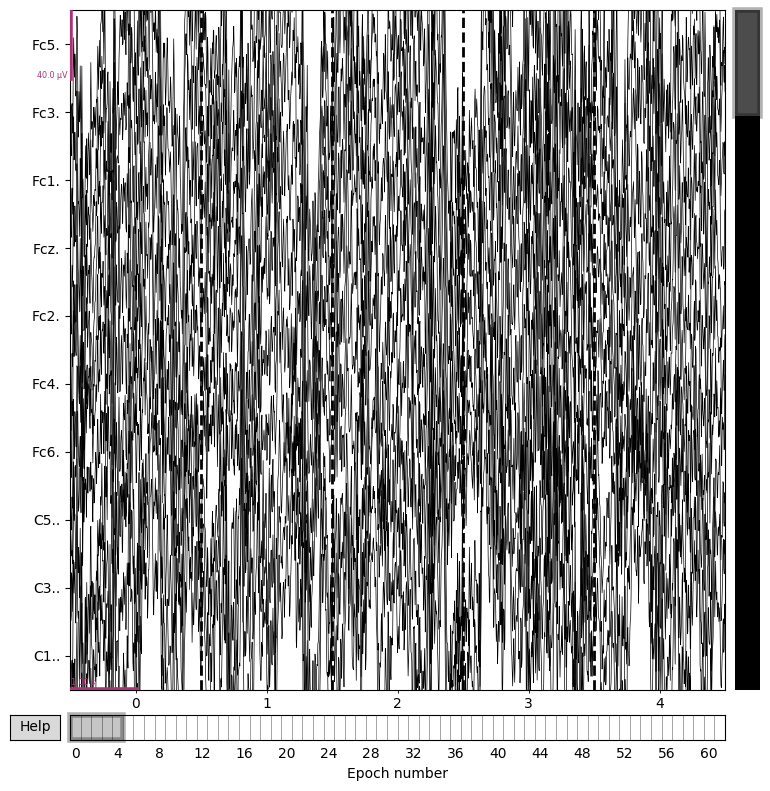

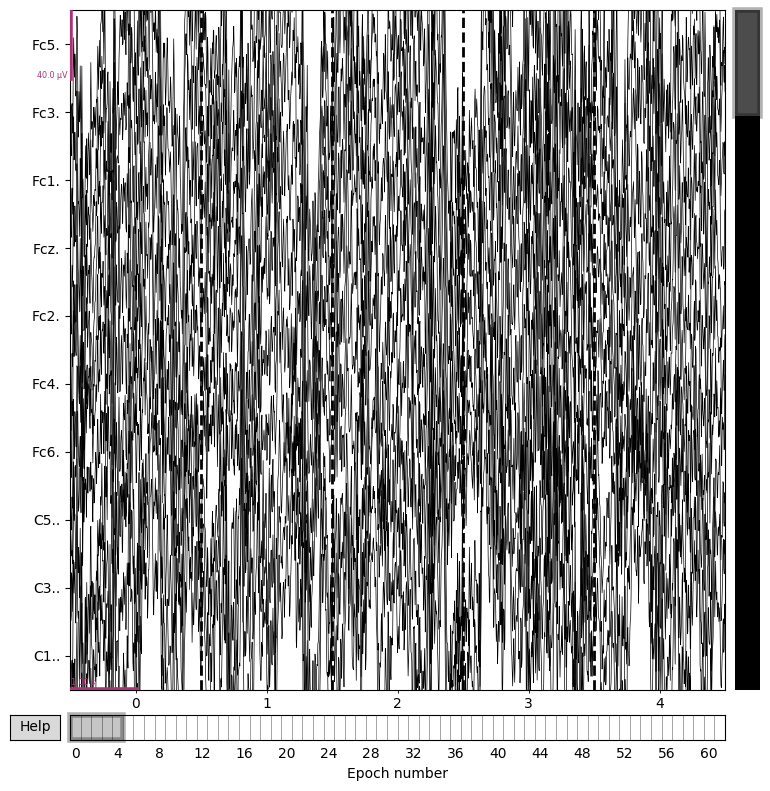

In [28]:
# Pick any EEG file for visual comparison
file_path = '/content/S001R04.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.filter(1., 50.)

# Create fixed length epochs
events = mne.make_fixed_length_events(raw, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=None, preload=True)

# Plot first 5 epochs
epochs.plot(n_epochs=5, n_channels=10, title="EEG Epochs")

Extracting EDF parameters from /content/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 62 events and 321 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


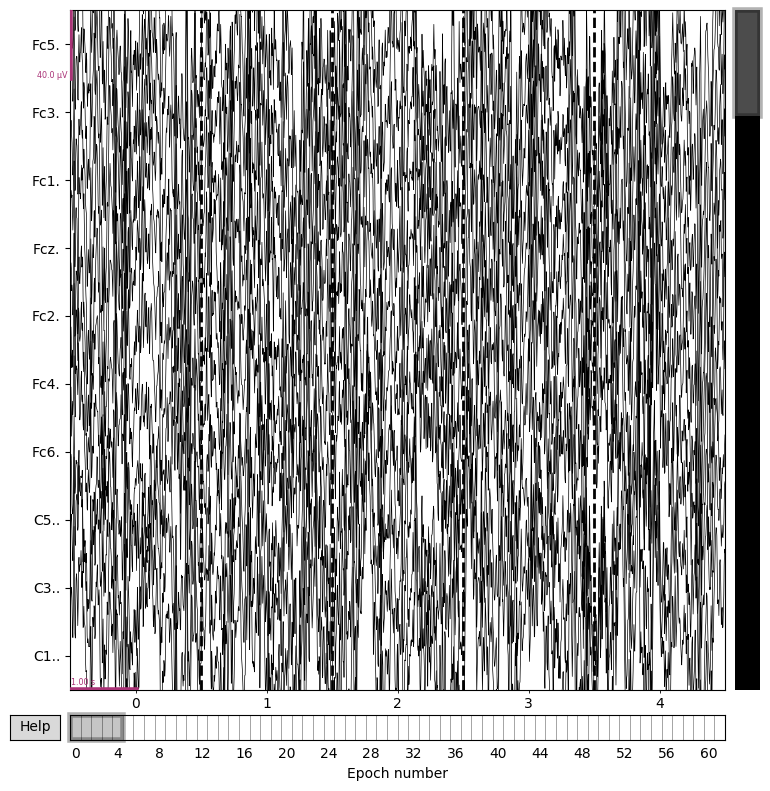

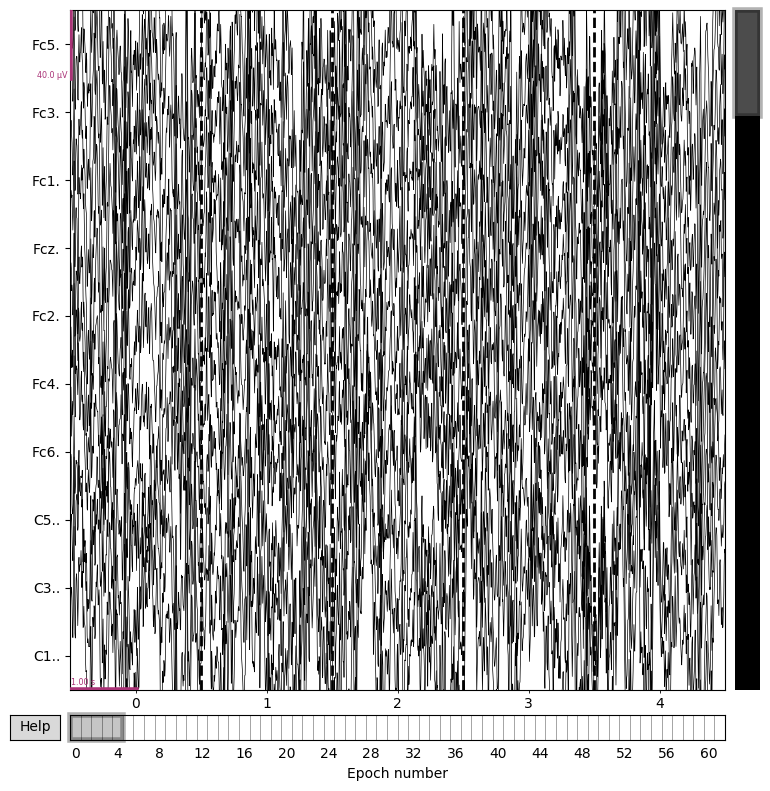

Extracting EDF parameters from /content/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)

Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 62 events and 321 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


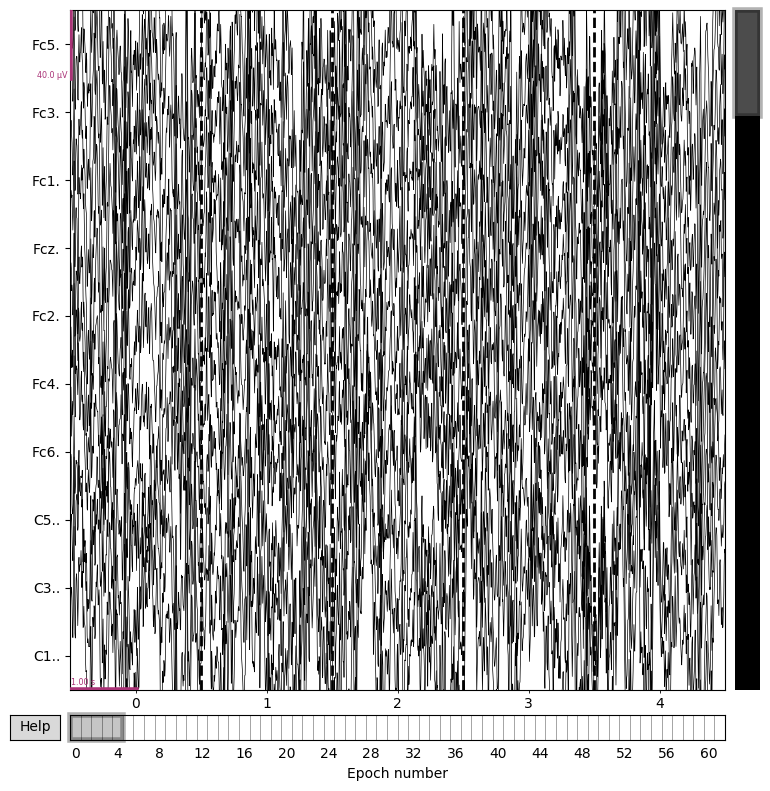

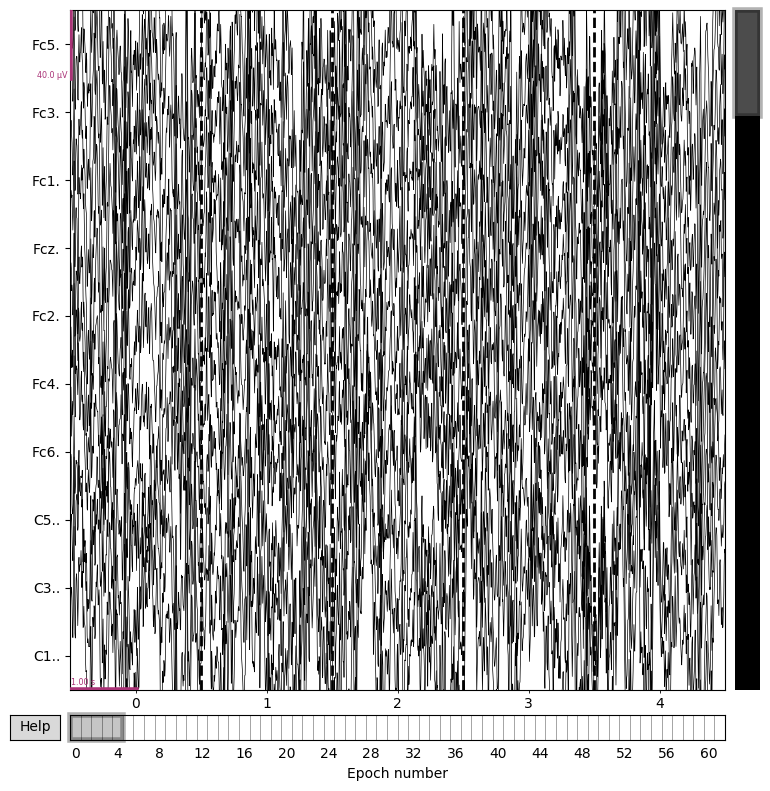

In [30]:
# Pick any EEG file for visual comparison
file_path = '/content/S001R07.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.filter(1., 50.)

# Create fixed length epochs
events = mne.make_fixed_length_events(raw, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=None, preload=True)

# Plot first 5 epochs
epochs.plot(n_epochs=5, n_channels=10, title="EEG Epochs")

Extracting EDF parameters from /content/S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 529 samples (3.306 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
62 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 62 events and 321 original time points ...
0 bad epochs dropped


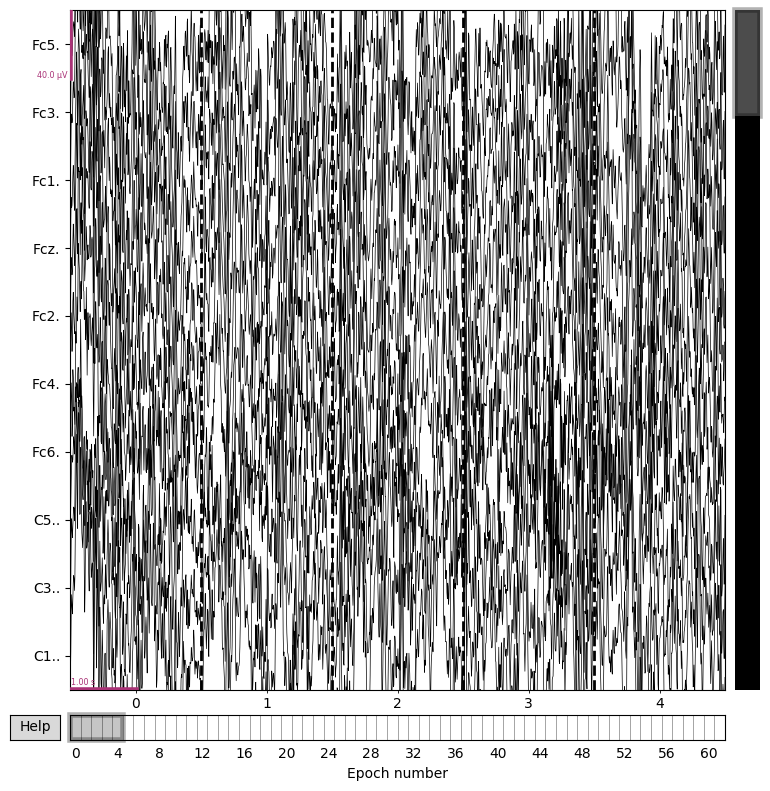

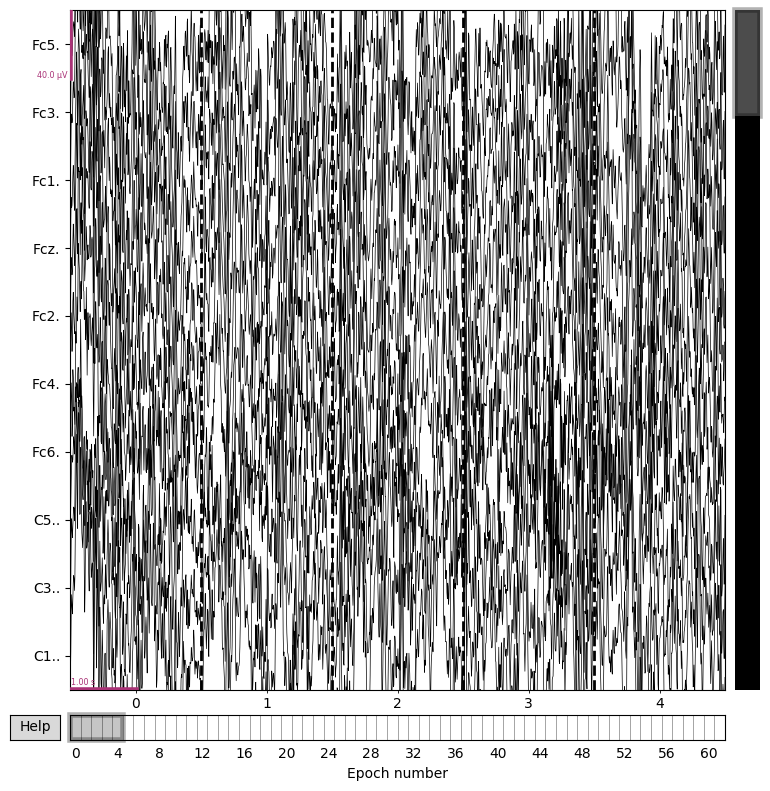

In [31]:
# Pick any EEG file for visual comparison
file_path = '/content/S001R08.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.filter(1., 50.)

# Create fixed length epochs
events = mne.make_fixed_length_events(raw, duration=2.0)
epochs = mne.Epochs(raw, events, tmin=0, tmax=2, baseline=None, preload=True)

# Plot first 5 epochs
epochs.plot(n_epochs=5, n_channels=10, title="EEG Epochs")

In [32]:
import numpy as np

X_clean = np.array(X_clean)
y_clean = np.array(y_clean)


Extract Bandwise Power (Theta, Alpha, Beta) from All Epochs

In [33]:
# Number of channels (assumes 3 bands per channel)
num_features = X_clean.shape[1]
num_channels = num_features // 3

# Split into theta, alpha, beta
theta_power = X_clean[:, 0::3]
alpha_power = X_clean[:, 1::3]
beta_power  = X_clean[:, 2::3]

Computing Average Power per Band per Class

In [34]:
# Boolean masks
attention_mask = y_clean == 1
distraction_mask = y_clean == 0

# Averages per band
theta_att = np.mean(theta_power[attention_mask], axis=0)
theta_dis = np.mean(theta_power[distraction_mask], axis=0)

alpha_att = np.mean(alpha_power[attention_mask], axis=0)
alpha_dis = np.mean(alpha_power[distraction_mask], axis=0)

beta_att = np.mean(beta_power[attention_mask], axis=0)
beta_dis = np.mean(beta_power[distraction_mask], axis=0)


Plot Comparison (Per Band)

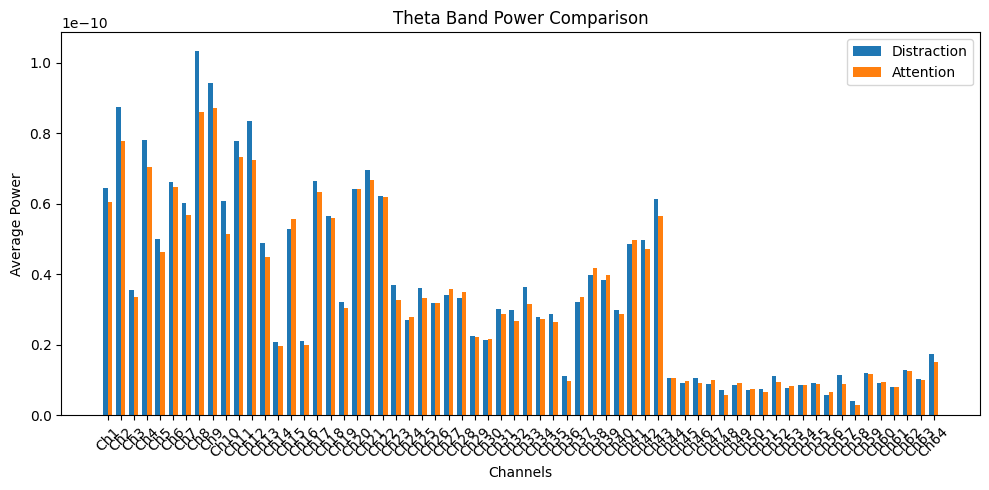

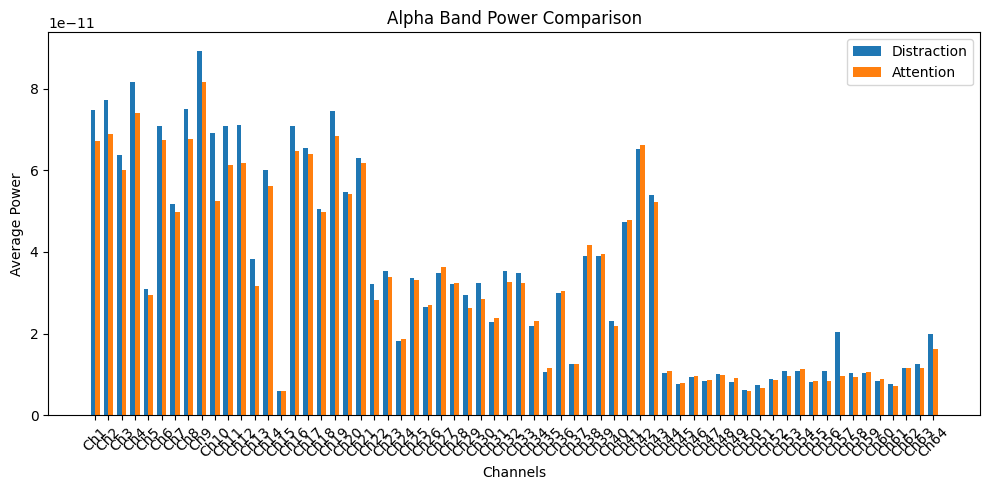

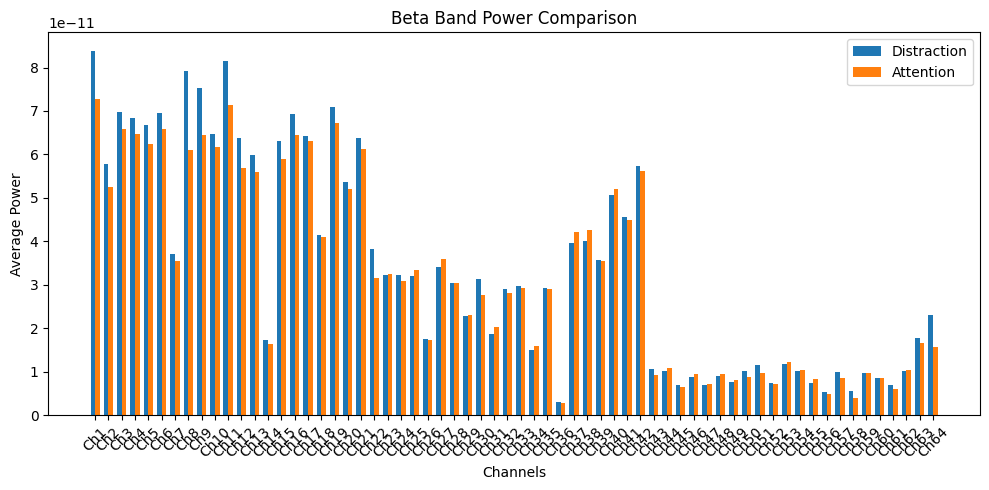

In [35]:
import matplotlib.pyplot as plt

channels = [f"Ch{i+1}" for i in range(num_channels)]

def plot_band_comparison(att, dis, band_name):
    x = np.arange(len(channels))
    width = 0.35
    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, dis, width, label='Distraction')
    plt.bar(x + width/2, att, width, label='Attention')
    plt.xticks(x, channels, rotation=45)
    plt.title(f"{band_name} Band Power Comparison")
    plt.xlabel("Channels")
    plt.ylabel("Average Power")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_band_comparison(theta_att, theta_dis, "Theta")
plot_band_comparison(alpha_att, alpha_dis, "Alpha")
plot_band_comparison(beta_att, beta_dis, "Beta")

Independent two sample t-test

In [36]:
from scipy.stats import ttest_ind

In [37]:
theta_power, alpha_power, beta_power
attention_mask = y_clean == 1
distraction_mask = y_clean == 0

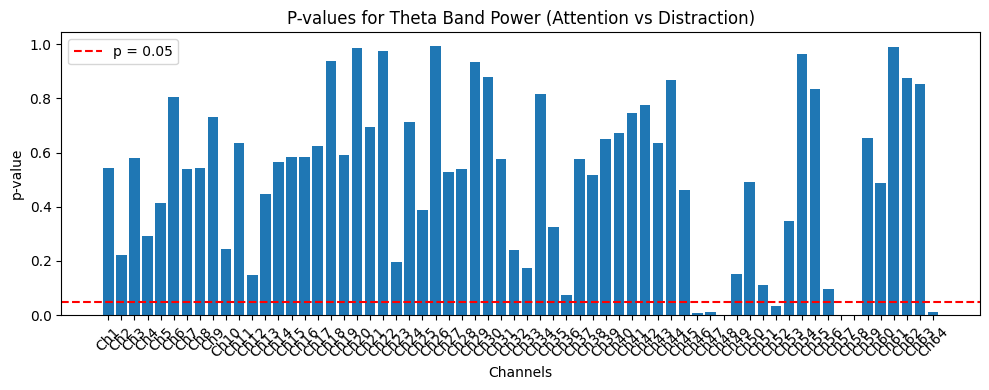

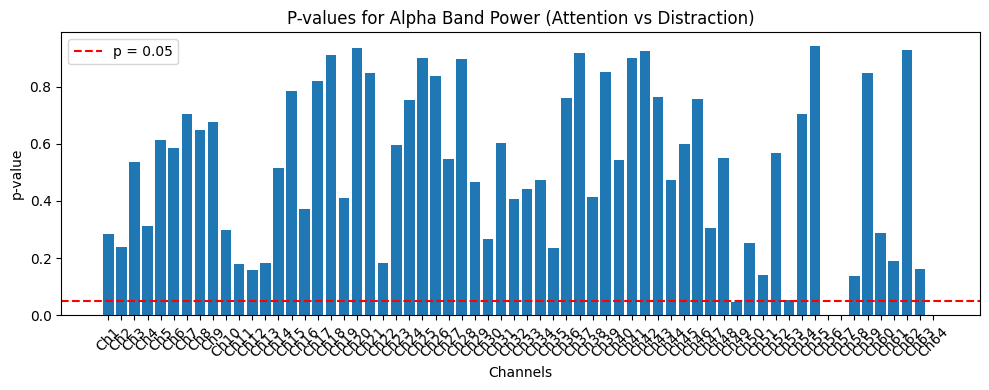

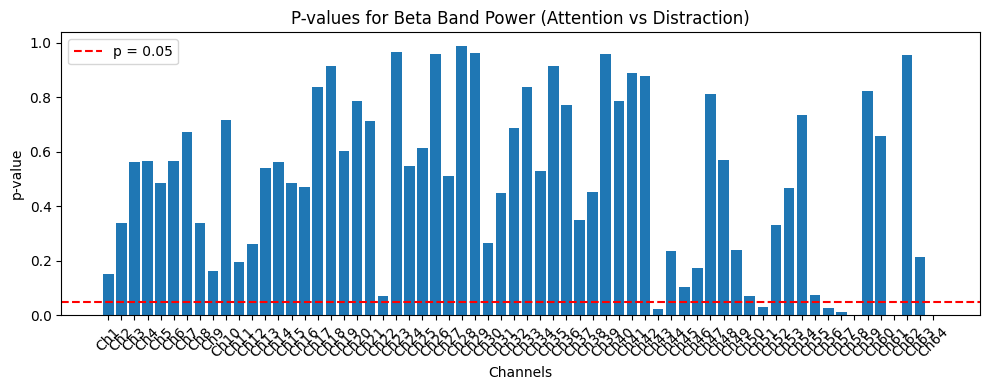

In [38]:
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

bands = ['Theta', 'Alpha', 'Beta']
band_data = [theta_power, alpha_power, beta_power]
channel_names = [f"Ch{i+1}" for i in range(theta_power.shape[1])]

# Store p-values for all bands
p_values_all = {}

for band_name, band_power in zip(bands, band_data):
    p_vals = []
    for i in range(band_power.shape[1]):  # each channel
        att_vals = band_power[attention_mask, i]
        dis_vals = band_power[distraction_mask, i]

        t_stat, p_val = ttest_ind(att_vals, dis_vals, equal_var=False)  # Welch's t-test
        p_vals.append(p_val)

    p_values_all[band_name] = p_vals

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.bar(channel_names, p_vals)
    plt.axhline(0.05, color='r', linestyle='--', label='p = 0.05')
    plt.xticks(rotation=45)
    plt.title(f"P-values for {band_name} Band Power (Attention vs Distraction)")
    plt.ylabel("p-value")
    plt.xlabel("Channels")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [60]:
# Example placeholder (already done earlier)
clf = RandomForestClassifier().fit(X_train, y_train)

Simulate Real Time Prediction

In [61]:
import time

# Use the test set (simulate it as streaming input)
stream_data = X_test  # each row is one time window
stream_labels = y_test  # actual labels (for comparison)

for i in range(len(stream_data)):
    sample = stream_data[i].reshape(1, -1)
    predicted = clf.predict(sample)[0]

    actual = stream_labels[i]

    print(f"Time {i}: Predicted: {'Attention' if predicted==1 else 'Distraction'} | Actual: {'Attention' if actual==1 else 'Distraction'}")

    time.sleep(0.5)  # simulate half-second delay (adjustable)

Time 0: Predicted: Distraction | Actual: Distraction
Time 1: Predicted: Attention | Actual: Attention
Time 2: Predicted: Attention | Actual: Attention
Time 3: Predicted: Distraction | Actual: Distraction
Time 4: Predicted: Distraction | Actual: Distraction
Time 5: Predicted: Attention | Actual: Attention
Time 6: Predicted: Attention | Actual: Attention
Time 7: Predicted: Attention | Actual: Attention
Time 8: Predicted: Distraction | Actual: Distraction
Time 9: Predicted: Attention | Actual: Attention
Time 10: Predicted: Attention | Actual: Attention
Time 11: Predicted: Distraction | Actual: Distraction
Time 12: Predicted: Attention | Actual: Attention
Time 13: Predicted: Distraction | Actual: Distraction
Time 14: Predicted: Attention | Actual: Distraction
Time 15: Predicted: Attention | Actual: Attention
Time 16: Predicted: Distraction | Actual: Distraction
Time 17: Predicted: Attention | Actual: Attention
Time 18: Predicted: Attention | Actual: Attention
Time 19: Predicted: Attention 

 Live Prediction + Real-Time Plotting (Simulated Streaming)

In [62]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time

In [63]:
# Use already trained model (clf), and data
stream_data = X_test  # EEG feature vectors
stream_labels = y_test  # actual labels

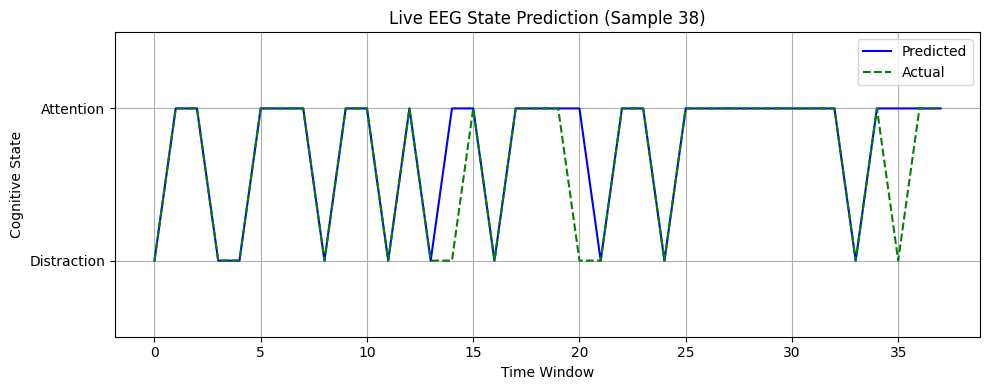

In [75]:
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# Parameters
window_size = 50
predictions = []
truths = []

for i in range(len(X_test)):
    sample = X_test[i].reshape(1, -1)
    pred = clf.predict(sample)[0]
    actual = y_test[i]

    predictions.append(pred)
    truths.append(actual)

    # Keep fixed-length window
    if len(predictions) > window_size:
        predictions = predictions[-window_size:]
        truths = truths[-window_size:]

    # Clear previous plot
    clear_output(wait=True)
    plt.figure(figsize=(10, 4))

    plt.plot(predictions, label='Predicted', color='blue')
    plt.plot(truths, label='Actual', color='green', linestyle='--')

    plt.ylim(-0.5, 1.5)
    plt.yticks([0, 1], ['Distraction', 'Attention'])  # Custom Y labels

    plt.title(f"Live EEG State Prediction (Sample {i+1})")
    plt.xlabel("Time Window")
    plt.ylabel("Cognitive State")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    time.sleep(0.3)  # Simulate real-time update
